Note that you need python 3.7 to have use datetime.datetime.fromisoformat()

In [1]:
import sys
assert sys.version_info >= (3, 7)

In [2]:
import numpy as np
from functions import split
from functions import load_data
from functions import compute_f1
from functions import corr_matrix
from functions import plot_feature
from functions import print_sample
from functions import convert_date
from functions import convert_type
from functions import print_feature
from functions import delete_feature
from functions import convert_one_hot
from functions import convert_weather
from functions import feature_output_corr
from functions import normalization_feature

# 0 Load data

In [4]:
header, data = load_data("data/training.csv", limit=10000)

# 1 Data preprocessing

## 1.1 Remove features with mostly missing values

In [5]:
print_feature(header, data, 3)

--------------------------------------------------
(00) Date/Hour (5899)
--------------------------------------------------
2015-04-24 12:00 :          7 ( 0.1%)
2016-08-15 08:00 :          6 ( 0.1%)
2016-08-12 17:00 :          6 ( 0.1%)
2015-10-02 23:00 :          6 ( 0.1%)
--------------------------------------------------
(01) Temperature (°C) (354)
--------------------------------------------------
21,0       :         83 ( 0.8%)
22,0       :         82 ( 0.8%)
21,1       :         80 ( 0.8%)
19,0       :         80 ( 0.8%)
--------------------------------------------------
(02) Drew point (°C) (364)
--------------------------------------------------
16,0       :        101 ( 1.0%)
16,2       :         91 ( 0.9%)
14,7       :         81 ( 0.8%)
13,1       :         81 ( 0.8%)
--------------------------------------------------
(03) Relativite humidity (%) (89)
--------------------------------------------------
73         :        234 ( 2.3%)
75         :        204 ( 2.0%)
79       

 * We can remove the feature without values in over 50% of samples. 

 * We decide to keep Weather as it is discrete and we can easily replace it with a one-hot vector. 

 * We also need to remove Withdrawals that is not available in test data.

In [6]:
header, data = delete_feature(header, data, "Visility indicator")
header, data = delete_feature(header, data, "hmdx")
header, data = delete_feature(header, data, "Wind Chill")

In [7]:
print(data.shape)
print(header)

(10000, 13)
['Date/Hour' 'Temperature (°C)' 'Drew point (°C)'
 'Relativite humidity (%)' 'wind direction (10s deg)' 'Wind speed (km/h)'
 'Visibility (km)' 'Pressure at the station (kPa)' 'Weather'
 'Public Holiday' 'Station Code' 'Withdrawals' 'Volume']


## 1.2 Convert Date to Year, Month, Day, Hour

In the date we can extract several informations : the Year, the Month, the day, and the hour.

From this, we can also deduce a useful information : the day of the week (if it's Monday, Tuesday, etc.).

In [8]:
header, data = convert_date(header, data)

In [9]:
print(data.shape)
print(header)

(10000, 23)
['Temperature (°C)' 'Drew point (°C)' 'Relativite humidity (%)'
 'wind direction (10s deg)' 'Wind speed (km/h)' 'Visibility (km)'
 'Pressure at the station (kPa)' 'Weather' 'Public Holiday' 'Station Code'
 'Withdrawals' 'Volume' 'Year' 'Month' 'Day' 'Hour' 'Monday' 'Tuesday'
 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']


### 1.2.1 One Hot encoding for Year and Month

In [10]:
header, data = convert_one_hot(header, data, "Year")
header, data = convert_one_hot(header, data, "Month")

In [11]:
print(data.shape)
print(header)

(10000, 31)
['Temperature (°C)' 'Drew point (°C)' 'Relativite humidity (%)'
 'wind direction (10s deg)' 'Wind speed (km/h)' 'Visibility (km)'
 'Pressure at the station (kPa)' 'Weather' 'Public Holiday' 'Station Code'
 'Withdrawals' 'Volume' 'Day' 'Hour' 'Monday' 'Tuesday' 'Wednesday'
 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Year 2015' 'Year 2016'
 'Month 10' 'Month 11' 'Month 4' 'Month 5' 'Month 6' 'Month 7' 'Month 8'
 'Month 9']


## 1.3 Convert Weather to binary vector

In [12]:
weather = [
    'Orages', 'Brouillard', 'Bruine', 'Généralement dégagé',
    'Généralement nuageux', 'Pluie', 'Pluie modérée', 'Pluie forte', 'Dégagé',
    'Nuageux', 'Neige'
]

header, data = convert_weather(header, data, weather)

In [13]:
print(data.shape)
print(header)

(10000, 41)
['Temperature (°C)' 'Drew point (°C)' 'Relativite humidity (%)'
 'wind direction (10s deg)' 'Wind speed (km/h)' 'Visibility (km)'
 'Pressure at the station (kPa)' 'Public Holiday' 'Station Code'
 'Withdrawals' 'Volume' 'Day' 'Hour' 'Monday' 'Tuesday' 'Wednesday'
 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Year 2015' 'Year 2016'
 'Month 10' 'Month 11' 'Month 4' 'Month 5' 'Month 6' 'Month 7' 'Month 8'
 'Month 9' 'Orages' 'Brouillard' 'Bruine' 'Généralement dégagé'
 'Généralement nuageux' 'Pluie' 'Pluie modérée' 'Pluie forte' 'Dégagé'
 'Nuageux' 'Neige']


## 1.4 Convert feature type from string to float (remove samples with missing values)

In [14]:
# samples with at least one missing value
missing = [d for d in data if "" in d]
print(len(missing))

# number of class 1 with missing value
index = np.where(header == "Volume")
print(sum(["1" in d[index] for d in missing]))

18
3


In [15]:
data = convert_type(data)

In [16]:
print(data.shape)
print(header)

(9982, 41)
['Temperature (°C)' 'Drew point (°C)' 'Relativite humidity (%)'
 'wind direction (10s deg)' 'Wind speed (km/h)' 'Visibility (km)'
 'Pressure at the station (kPa)' 'Public Holiday' 'Station Code'
 'Withdrawals' 'Volume' 'Day' 'Hour' 'Monday' 'Tuesday' 'Wednesday'
 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Year 2015' 'Year 2016'
 'Month 10' 'Month 11' 'Month 4' 'Month 5' 'Month 6' 'Month 7' 'Month 8'
 'Month 9' 'Orages' 'Brouillard' 'Bruine' 'Généralement dégagé'
 'Généralement nuageux' 'Pluie' 'Pluie modérée' 'Pluie forte' 'Dégagé'
 'Nuageux' 'Neige']


## 1.5 Normalization of continuous data

The concerned features are : Temperature, Drew point, Relativite humidity, wind direction, Wind speed, and Pressure at the station

In [17]:
normalization_feature(header, data, "Temperature (°C)")
normalization_feature(header, data, "Drew point (°C)")
normalization_feature(header, data, "Relativite humidity (%)")
normalization_feature(header, data, "wind direction (10s deg)")
normalization_feature(header, data, "Wind speed (km/h)")
normalization_feature(header, data, "Pressure at the station (kPa)")

## 1.6 Get x, y (withdrawals) and label (volume)

In [18]:
header, x, y, label = split(header, data)

# 2 Data analysis & visualization

## 2.1 Distribution of the features

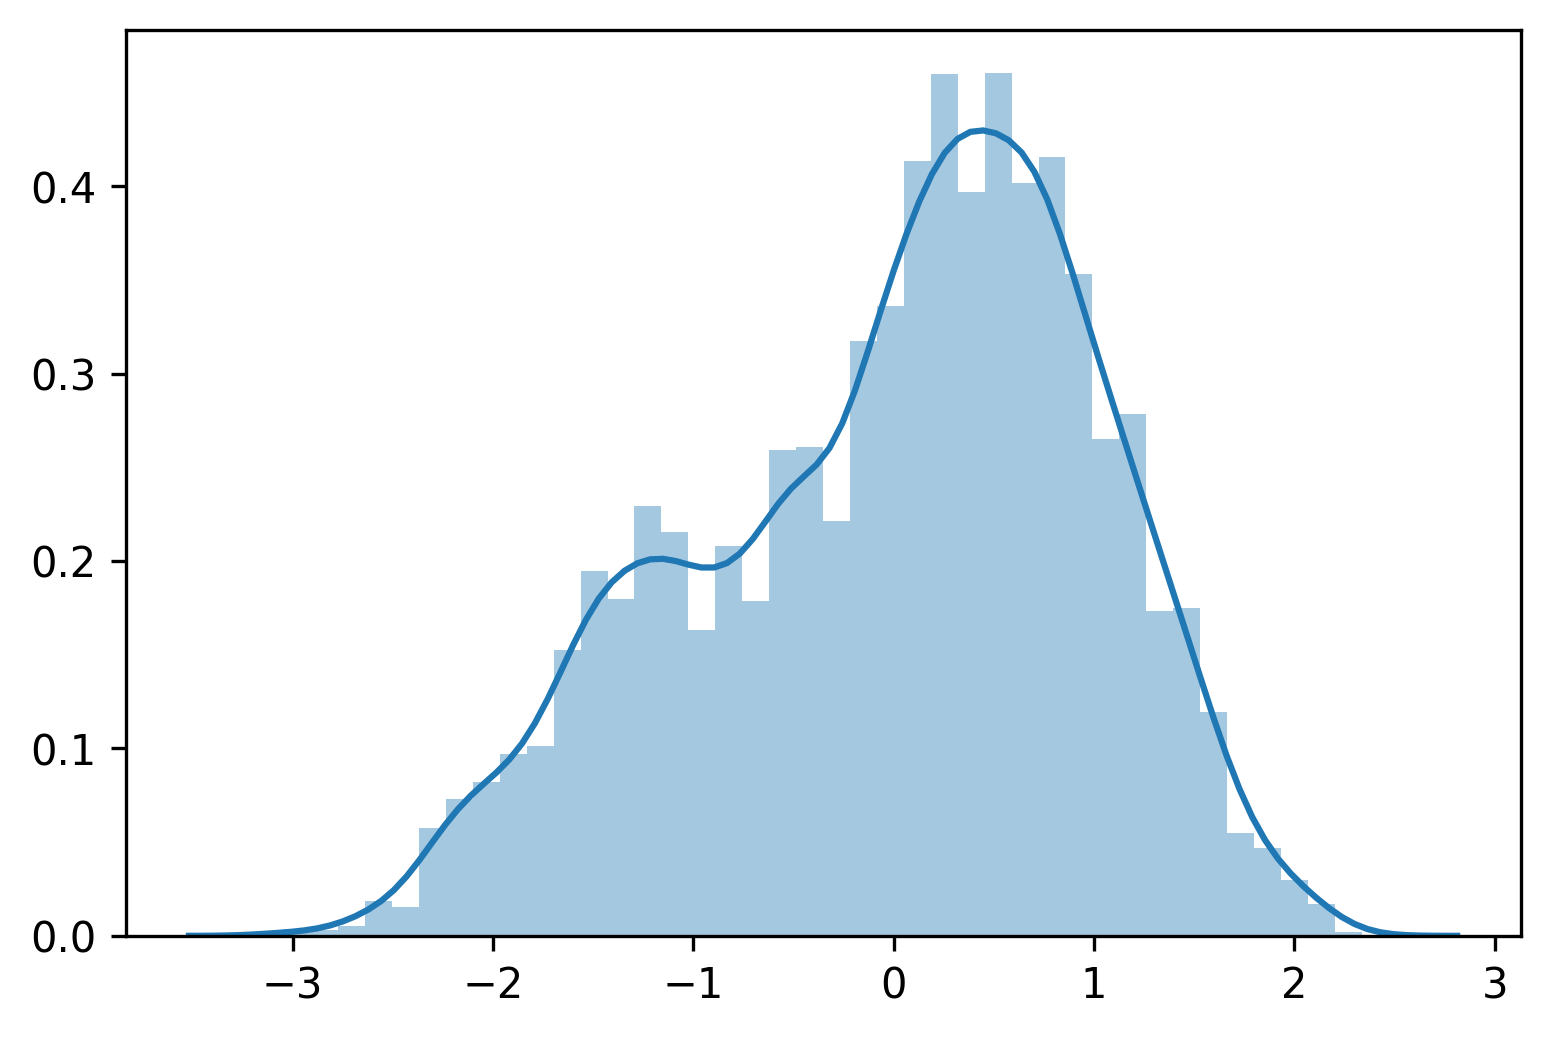

In [19]:
plot_feature(header, x, "Temperature (°C)")

## 2.2 Correlation of features and output

In [20]:
feature_output_corr(header, x, y, 10)

Temperature (°C)               :  0.318
Relativite humidity (%)        : -0.293
Hour                           :  0.291
Visibility (km)                :  0.239
Drew point (°C)                :  0.109
Wind speed (km/h)              :  0.104
Pluie                          : -0.096
Year 2016                      :  0.095
Year 2015                      : -0.095
Month 4                        : -0.087


In [21]:
feature_output_corr(header, x, label, 10)

Temperature (°C)               :  0.190
Relativite humidity (%)        : -0.168
Hour                           :  0.154
Visibility (km)                :  0.151
Drew point (°C)                :  0.069
Wind speed (km/h)              :  0.066
Year 2016                      :  0.064
Year 2015                      : -0.064
Month 7                        :  0.053
Month 4                        : -0.052


### 2.3 Correlation matrix of the features

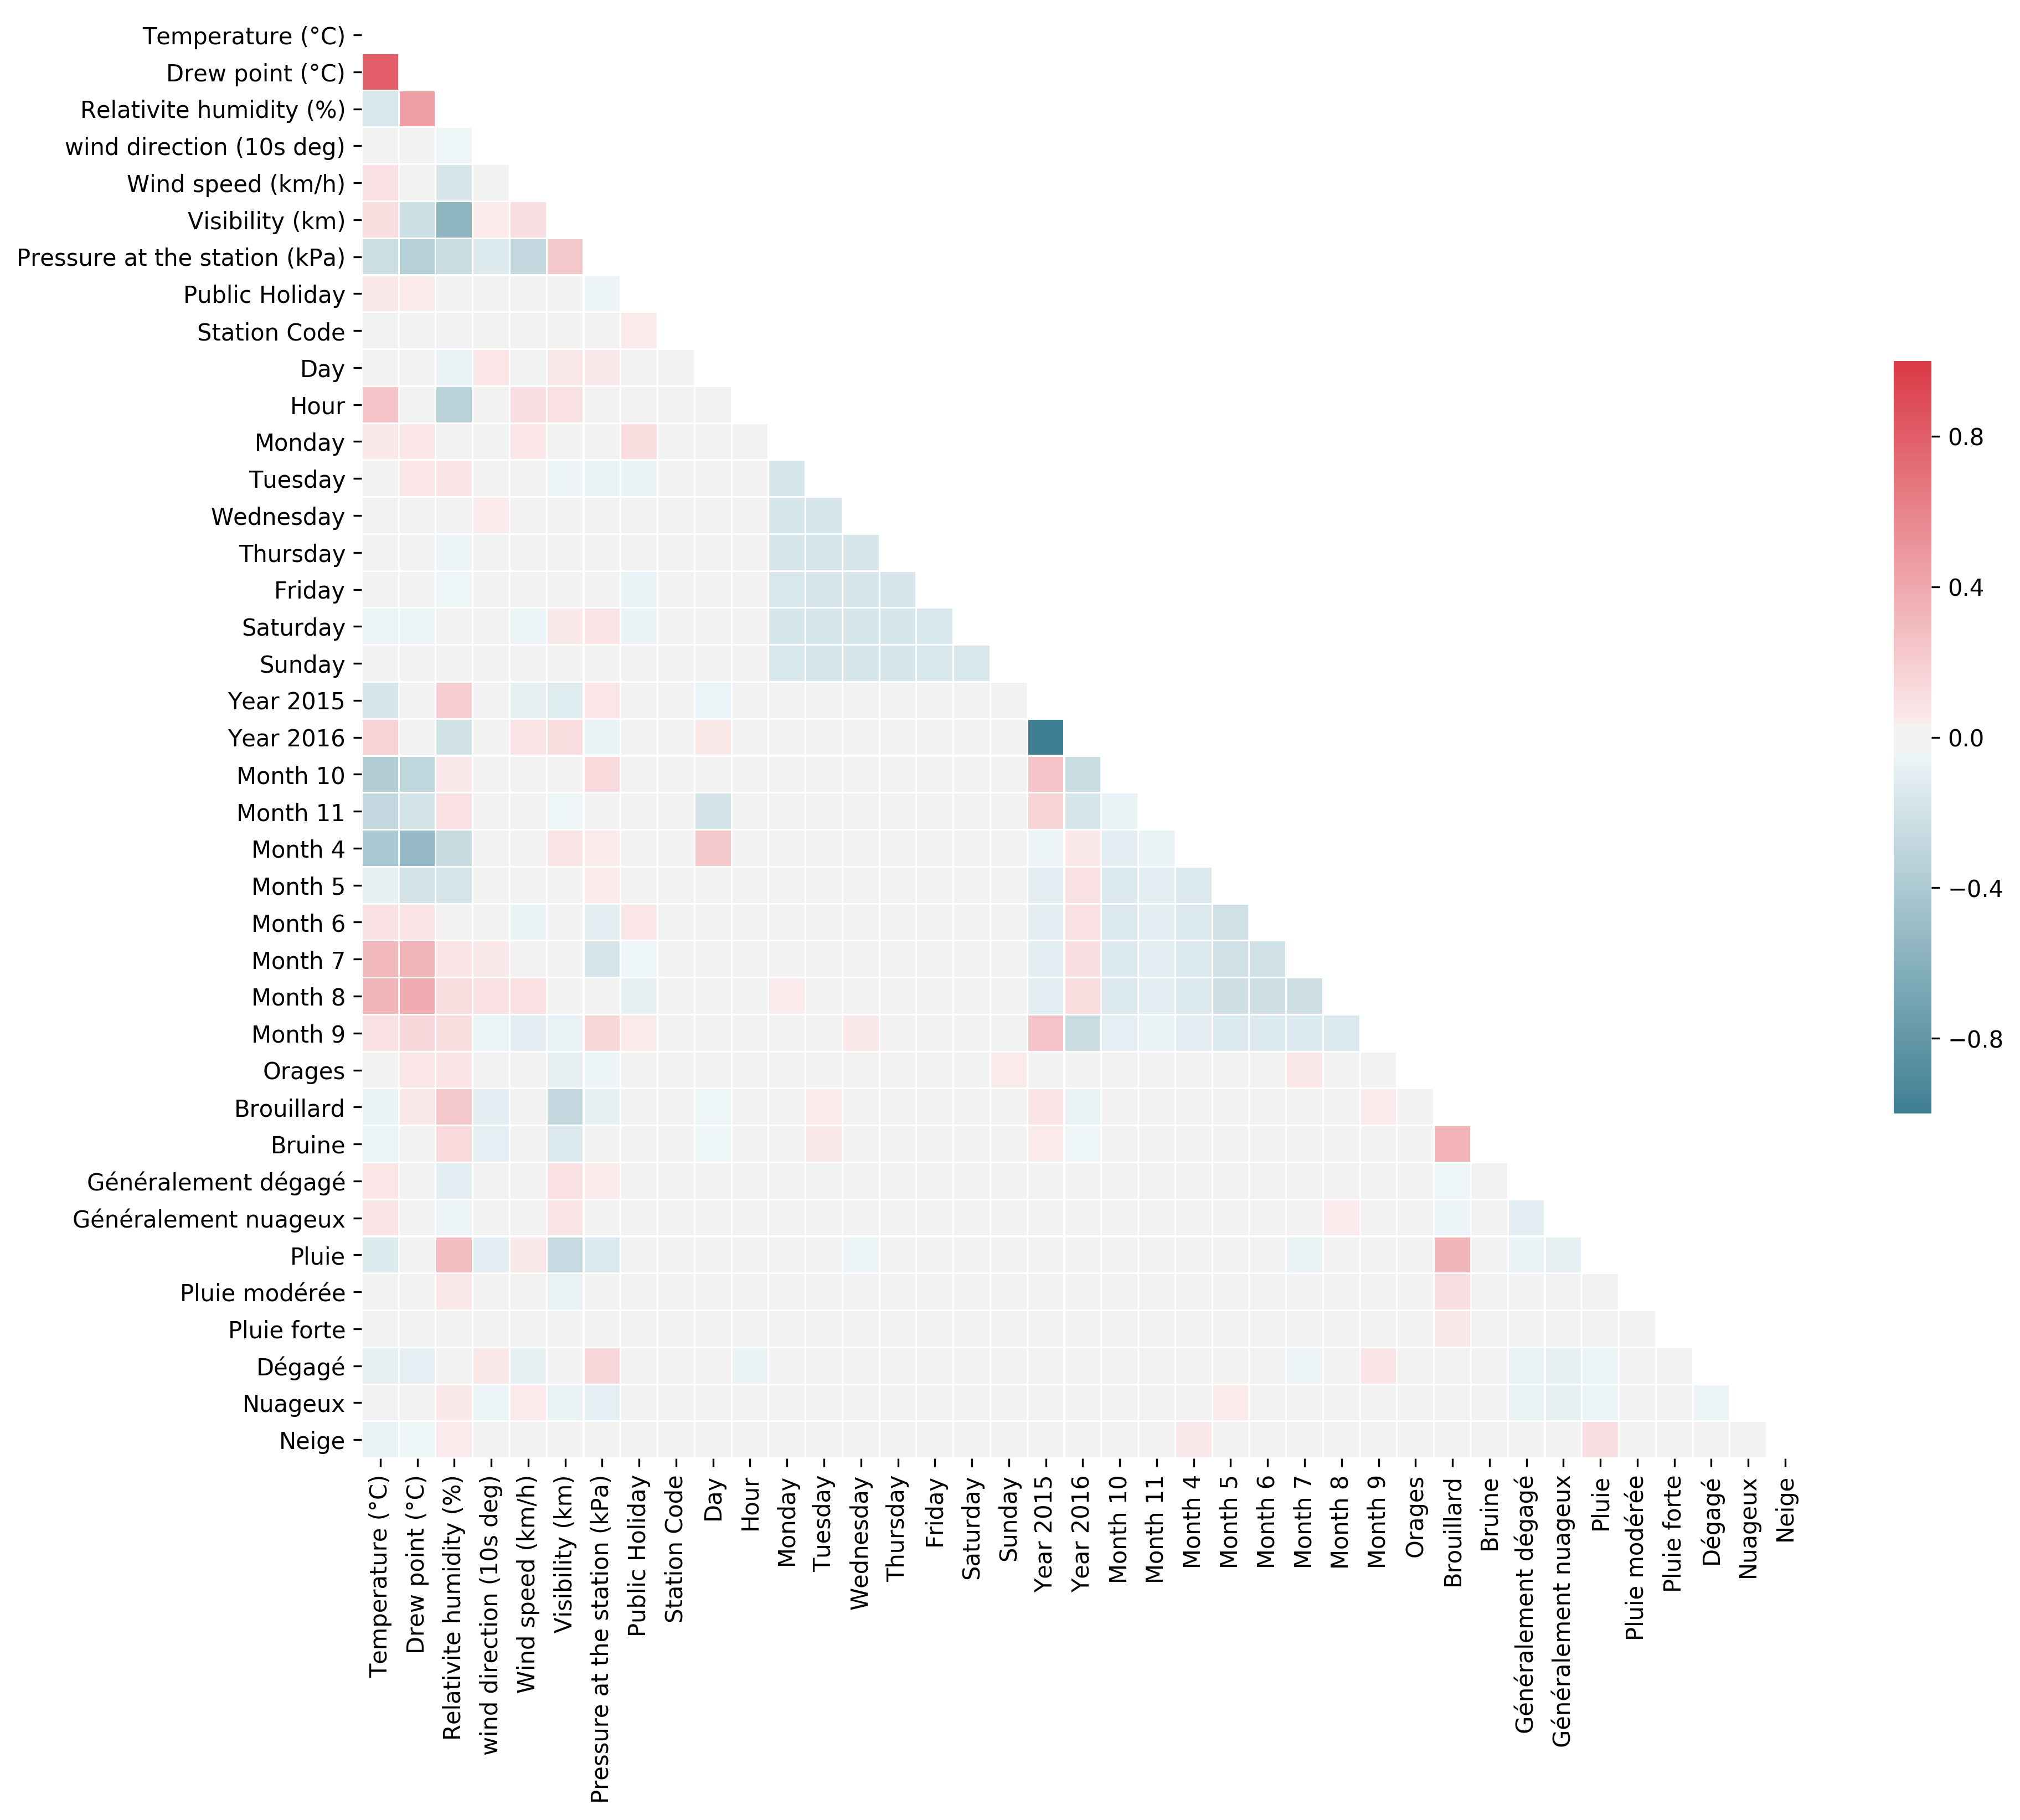

In [22]:
corr_matrix(header, x)

# Pipeline

In [24]:
def pipeline(path="data/training.csv",
             limit=None,
             delete_features=["Visility indicator", "hmdx", "Wind Chill"],
             cvrt_date=True,
             weather=[
                 "Orages", "Brouillard", "Bruine", "Généralement dégagé",
                 "Généralement nuageux", "Pluie", "Pluie modérée",
                 "Pluie forte", "Dégagé", "Nuageux", "Neige"
             ],
             one_hot_features=["Year", "Month"],
             norm_features=[
                 "Temperature (°C)", "Drew point (°C)",
                 "Relativite humidity (%)", "wind direction (10s deg)",
                 "Wind speed (km/h)", "Pressure at the station (kPa)"
             ]):
    """
    path :           (STRING) path of the file to load.
    limit:           (INT) limit the number of example to load.
    delete_features: (LIST) feature names to remove.
    cvrt_date:       (BOOLEAN) convert the data
    weather:         (LIST) weather to consider. All other will be dropped.
    one_hot_features (LIST) feature names to convert in one-hot vector.
    norm_features    (LIST) feature names to normalize in one-hot vector
    """
    header, data = load_data(path, limit)

    for f in delete_features:
        header, data = delete_feature(header, data, f)

    if cvrt_date:
        header, data = convert_date(header, data)

    for f in one_hot_features:
        header, data = convert_one_hot(header, data, f)

    if weather:
        header, data = convert_weather(header, data, weather)

    data = convert_type(data)

    for f in norm_features:
        normalization_feature(header, data, f)

    return split(header, data)

# Models

## Load and split data

In [25]:
header, x, y, label = pipeline(limit=1000)

In [26]:
split = int(x.shape[0] * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]
label_train, label_test = label[:split], label[split:]

### Logistic regression

In [ ]:
model = LogisticRegression(max_iter=9999, class_weight={0: 1, 1: 6})
model = model.fit(x_train, label_train)

In [ ]:
prediction = model.predict_proba(x_test)
proba = list(zip(*prediction))[1]

In [ ]:
compute_f1(proba, label_test, plot=True)